In [1]:
import pandas as pd
import numpy as np 
from xgboost import XGBClassifier as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Nuwaraeliya_c_data.csv')

In [3]:
df.head()

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres,hum
0,1/1/2022,16.1,12.7,20.9,1.5,81.0,7.7,1017.8,59.0
1,1/2/2022,15.1,13.7,17.1,0.5,70.0,11.6,1016.7,83.0
2,1/3/2022,15.2,13.8,16.9,3.3,65.0,11.5,1016.2,84.5
3,1/4/2022,15.6,12.0,18.7,0.5,58.0,9.1,1017.0,66.5
4,1/5/2022,15.0,13.6,17.6,3.9,54.0,5.6,1016.9,80.0


In [4]:
df.info

<bound method DataFrame.info of            date  tavg  tmin  tmax  prcp  wdir  wspd    pres   hum
0      1/1/2022  16.1  12.7  20.9   1.5  81.0   7.7  1017.8  59.0
1      1/2/2022  15.1  13.7  17.1   0.5  70.0  11.6  1016.7  83.0
2      1/3/2022  15.2  13.8  16.9   3.3  65.0  11.5  1016.2  84.5
3      1/4/2022  15.6  12.0  18.7   0.5  58.0   9.1  1017.0  66.5
4      1/5/2022  15.0  13.6  17.6   3.9  54.0   5.6  1016.9  80.0
..          ...   ...   ...   ...   ...   ...   ...     ...   ...
725  12/27/2023  16.3  15.0  17.9   8.9  64.0  15.5  1016.9  85.5
726  12/28/2023  15.9  15.5  16.9  62.0  85.0  14.7  1016.3  93.0
727  12/29/2023  15.4  15.0  16.3  16.3  86.0  11.6  1016.9  93.5
728  12/30/2023  15.7  13.7  18.5   5.3  77.0  13.4  1016.5  76.0
729  12/31/2023  15.4  14.4  18.0   8.7  75.0  12.0  1016.6  82.0

[730 rows x 9 columns]>

In [5]:
df.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres,hum
count,729.000000,729.000000,729.000000,729.000000,728.000000,728.000000,728.000000,730.000000
mean,15.962689,12.827023,20.098903,5.385871,197.206044,9.675687,1014.447527,63.690411
std,1.040159,1.763534,1.934043,10.257425,93.926579,5.299783,1.759523,14.443045
min,10.500000,5.200000,13.200000,0.000000,1.000000,2.200000,1009.300000,18.000000
25%,15.300000,12.000000,18.800000,0.000000,95.000000,5.400000,1013.200000,54.500000
50%,16.000000,13.200000,20.200000,1.000000,250.000000,8.000000,1014.500000,64.750000
75%,16.700000,14.000000,21.500000,5.600000,261.250000,13.000000,1015.500000,73.500000
max,19.200000,16.200000,24.900000,102.100000,359.000000,31.800000,1020.400000,100.000000


In [6]:
print(df.isnull().sum())

date    0
tavg    1
tmin    1
tmax    1
prcp    1
wdir    2
wspd    2
pres    2
hum     0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print(df.isnull().sum())

date    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
hum     0
dtype: int64


In [9]:
use_df = df[['tavg','hum']]
use_df.head()

,tavg,hum
0,16.1,59.0
1,15.1,83.0
2,15.2,84.5
3,15.6,66.5
4,15.0,80.0


# Creating the Target Variable

In [10]:
use_df['Score'] = 100 - (abs(df['tavg'] - 15) + abs(df['hum'] - 50))

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_29176\1981225238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['Score'] = 100 - (abs(df['tavg'] - 15) + abs(df['hum'] - 50))


In [11]:
use_df.head()

,tavg,hum,Score
0,16.1,59.0,89.9
1,15.1,83.0,66.9
2,15.2,84.5,65.3
3,15.6,66.5,82.9
4,15.0,80.0,70.0


In [12]:
def categorize_score(score):
    if score >= 80:
        return 'Healthy'
    elif score >= 60:
        return 'Medium'
    else:
        return 'Poor'

use_df['Condition'] = use_df['Score'].apply(categorize_score)

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_29176\1060790252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['Condition'] = use_df['Score'].apply(categorize_score)


In [13]:
use_df.head()

,tavg,hum,Score,Condition
0,16.1,59.0,89.9,Healthy
1,15.1,83.0,66.9,Medium
2,15.2,84.5,65.3,Medium
3,15.6,66.5,82.9,Healthy
4,15.0,80.0,70.0,Medium


In [14]:
label_encoder = LabelEncoder()

use_df['Condition_En'] = label_encoder.fit_transform(use_df['Condition'])

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_29176\331348435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['Condition_En'] = label_encoder.fit_transform(use_df['Condition'])


In [15]:
use_df.head()

,tavg,hum,Score,Condition,Condition_En
0,16.1,59.0,89.9,Healthy,0
1,15.1,83.0,66.9,Medium,1
2,15.2,84.5,65.3,Medium,1
3,15.6,66.5,82.9,Healthy,0
4,15.0,80.0,70.0,Medium,1


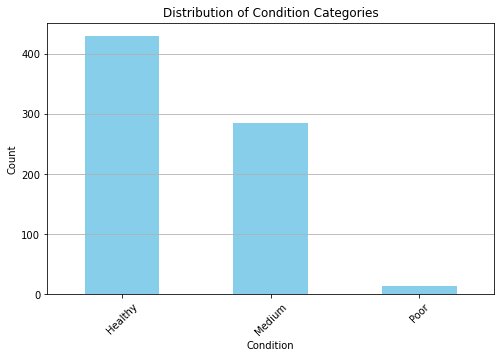

In [16]:
plt.figure(figsize=(8, 5))
use_df['Condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Condition Categories')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
X = use_df[['tavg', 'hum']]
y = use_df['Condition_En']

# Using SMOTE for Imbalance Dataset

In [18]:
smote = SMOTE(random_state=42, k_neighbors=2)

In [19]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
df_resampled = pd.DataFrame(X_resampled, columns=['tavg', 'hum'])
df_resampled['Condition_En'] = y_resampled


In [21]:
df_resampled['Condition'] = label_encoder.inverse_transform(df_resampled['Condition_En'])

In [22]:
print("\nNew Distribution after SMOTE:\n", df_resampled['Condition'].value_counts())


New Distribution after SMOTE:
 Healthy    430
Medium     430
Poor       430
Name: Condition, dtype: int64


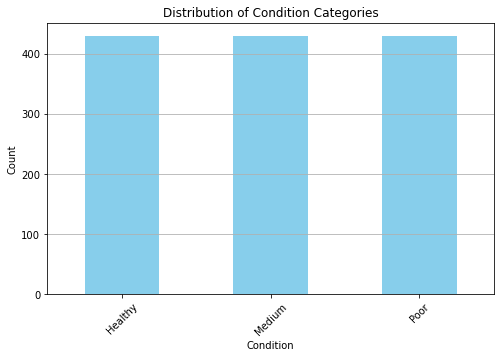

In [23]:
plt.figure(figsize=(8, 5))
df_resampled['Condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Condition Categories')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [24]:
df_resampled.head()

,tavg,hum,Condition_En,Condition
0,16.1,59.0,0,Healthy
1,15.1,83.0,1,Medium
2,15.2,84.5,1,Medium
3,15.6,66.5,0,Healthy
4,15.0,80.0,1,Medium


In [25]:
df_resampled

,tavg,hum,Condition_En,Condition
0,16.100000,59.000000,0,Healthy
1,15.100000,83.000000,1,Medium
2,15.200000,84.500000,1,Medium
3,15.600000,66.500000,0,Healthy
4,15.000000,80.000000,1,Medium
...,...,...,...,...
1285,15.241346,90.793268,2,Poor
1286,14.743554,90.717771,2,Poor
1287,15.627264,93.310614,2,Poor
1288,14.902468,90.500000,2,Poor


In [26]:
y_resampled.value_counts()

0    430
1    430
2    430
Name: Condition_En, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df_resampled[['tavg', 'hum']], 
    df_resampled['Condition_En'], 
    test_size=0.2, 
    random_state=42)

In [28]:
X_train.shape

(1032, 2)

In [29]:
y_test.shape

(258,)

In [30]:
xgb = xgb(use_label_encoder=False, eval_metric='mlogloss')
cv_scores = cross_val_score(xgb, X_resampled, y_resampled, cv=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
y_pred = xgb.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [33]:
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Accuracy: 0.9961240310077519

Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      0.99      0.99        89
      Medium       0.99      1.00      0.99        88
        Poor       1.00      1.00      1.00        81

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [34]:
cv_scores = cross_val_score(xgb, X_resampled, y_resampled, cv=5)

<Figure size 576x432 with 0 Axes>

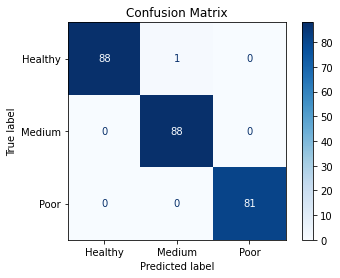

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Random Forest Classifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5)  # 5-fold cross-validation


print(f"\nAverage Cross-Validation Accuracy: {cv_scores.mean():.2f}")


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)



Average Cross-Validation Accuracy: 0.99

Accuracy: 0.9961240310077519

Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      0.99      0.99        89
      Medium       0.99      1.00      0.99        88
        Poor       1.00      1.00      1.00        81

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



# Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(logreg_classifier, X_resampled, y_resampled, cv=5)  


print(f"\nAverage Cross-Validation Accuracy: {cv_scores.mean():.2f}")


logreg_classifier.fit(X_train, y_train)


y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Average Cross-Validation Accuracy: 0.88

Accuracy: 0.9031007751937985

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.87      0.85      0.86        89
      Medium       0.85      0.86      0.86        88
        Poor       0.99      1.00      0.99        81

    accuracy                           0.90       258
   macro avg       0.91      0.91      0.91       258
weighted avg       0.90      0.90      0.90       258

